# Soluciones al practico 1
Este notebook presenta las soluciones al TP 1 de la materia de aprendizaje automático de la MS-MineriaDatos UTN.

**Metodología y Procesamiento:**

Hemos empleado para la exploración de datos a libreria pandas_profiling. 
Ver ejemplos https://www.kaggle.com/shabanamir/ds-project-life-expectancy-who


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
from sklearn.preprocessing import Normalizer

In [3]:
os.listdir('datasets')

['breast_cancer.csv',
 'weatherAUS.csv',
 'who_life_expectancy.csv',
 'iris.csv',
 'diabetes.csv']

## Explorando Iris data

In [4]:
os.getcwd()

'/home/sebacastillo/PycharmProjects/utn_aprendizaje_automatico/Practica 1'

In [5]:
iris = pd.read_csv('datasets/iris.csv')

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
def scattermatrix(df, title = None, xaxis = None, yaxis = None):
    p = pd.plotting.scatter_matrix(df, c=df.name.astype('category').cat.codes)
    p = plt.title(title)
    p = plt.xlabel(xaxis)
    p = plt.ylabel(yaxis)
    return p

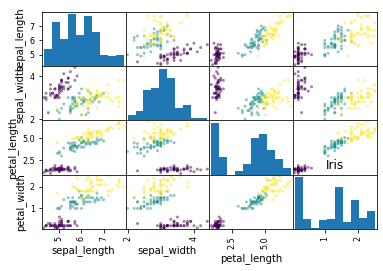

In [8]:
scattermatrix(iris, title = "Iris");

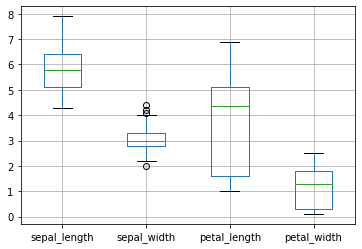

In [9]:
iris.boxplot();

In [10]:
from pandas_profiling import ProfileReport

In [11]:
iris_profiling = ProfileReport(iris, title="Pandas Profiling Report")

In [12]:
iris_profiling.to_widgets()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Limpieza para minería

- Eliminación de outliers (petal_lenght) y registros duplicados (2).
- Normalización con zscores

 

Eliminando outliers

In [13]:
Q1 =  iris['sepal_width'].quantile(0.25)
Q3 = iris['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
iris[(iris['sepal_width'] < Q1-1.5*IQR ) | (iris['sepal_width'] > Q3+1.5*IQR)]['sepal_width']

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64

Creando funcion para remoción de outlieres via método de IQR

In [15]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [16]:
iris = remove_outlier_IQR(iris);

<ipython-input-15-875d614481ff>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
<ipython-input-15-875d614481ff>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]


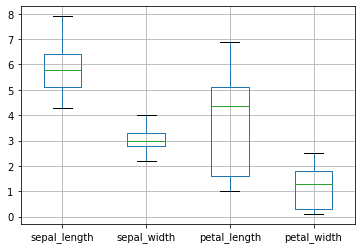

In [17]:
iris.boxplot();

Elimino duplicados

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
iris = iris.drop_duplicates()

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   143 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   name          147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


Normalizando con zscores

In [21]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std


In [22]:
irisdata = iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [23]:
irisdata = z_score(irisdata)

In [24]:
irisdata.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113268,0.871305,0.817058
sepal_width,-0.113268,1.000000,-0.396539,-0.328102
petal_length,0.871305,-0.396539,1.000000,0.961883
petal_width,0.817058,-0.328102,0.961883,1.000000


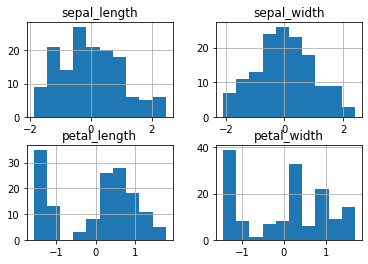

In [25]:
irisdata.hist();

## Conclusion

Se observa: una correlación positiva fuerte entre el largo de los cépalos y el tamaño de los petalos, e inversa entre el ancho de los cépalos y el tamaño de los pétalos.

# Explorando Otros Datos

## Diabetes

Diabetes is a disease that occurs when the blood glucose level becomes high, which ultimately leads to other health problems such as heart diseases, kidney disease, etc. Diabetes is caused mainly due to the consumption of highly processed food, bad consumption habits, etc. In these practic assigment we will be using an existing data set called the “Pima Indians Diabetes Database” provided by the UCI Machine Learning Repository.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant   
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test    
BloodPressure: Diastolic blood pressure (mm Hg)    
SkinThickness: Triceps skin fold thickness (mm)    
Insulin: 2-Hour serum insulin (mu U/ml)   
BMI: Body mass index (weight in kg/(height in m)^2)   
DiabetesPedigreeFunction: Diabetes pedigree function    
Age: Age (years)     

Source: https://data.world/data-society/pima-indians-diabetes-database




In [26]:
diabetes = pd.read_csv('datasets/diabetes.csv')

In [27]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Clase                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [28]:
diabetes_profiling = ProfileReport(diabetes, title="Pandas Profiling Report")


In [29]:
diabetes_profiling.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Valores anómalos:**
- Blood pressure: tiene 90 observaciones con valores 0
- Glucose: tiene 13 obs con valor 0
- Skin Thickness (espesor de la piel): tiene 573 observaciones en 0
- Insulin: idem 956
- BMI: idem 28

**Otuliers**

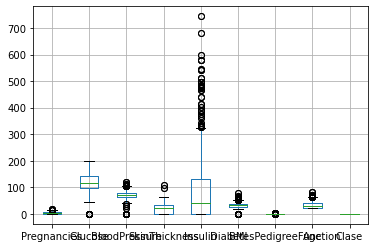

In [30]:
diabetes.boxplot();

### Limpieza para minería

- Eliminación de outliers  y registros duplicados (730).
- Normalización con zscores

 

In [31]:
diabetesdata = diabetes.drop_duplicates()

In [32]:
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Clase                     744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [33]:
diabetesdata = remove_outlier_IQR(diabetesdata)

In [34]:
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               740 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             701 non-null    float64
 3   SkinThickness             742 non-null    float64
 4   Insulin                   716 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  718 non-null    float64
 7   Age                       728 non-null    float64
 8   Clase                     744 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 58.1 KB


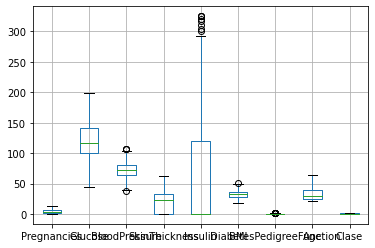

In [35]:
diabetesdata.boxplot();

In [36]:
diabetesdata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
Pregnancies,1.000000,0.105621,0.204132,-0.076012,-0.078748,0.040713,0.018807,0.581113,0.202989
Glucose,0.105621,1.000000,0.203395,0.065975,0.236034,0.242235,0.092861,0.249300,0.482885
BloodPressure,0.204132,0.203395,1.000000,0.051433,-0.041268,0.287178,0.038202,0.337052,0.193806
SkinThickness,-0.076012,0.065975,0.051433,1.000000,0.492699,0.385168,0.158100,-0.065195,0.074679
Insulin,-0.078748,0.236034,-0.041268,0.492699,1.000000,0.187050,0.213813,-0.027313,0.094468
BMI,0.040713,0.242235,0.287178,0.385168,0.187050,1.000000,0.121333,0.094469,0.302551
DiabetesPedigreeFunction,0.018807,0.092861,0.038202,0.158100,0.213813,0.121333,1.000000,0.067984,0.165674
Age,0.581113,0.249300,0.337052,-0.065195,-0.027313,0.094469,0.067984,1.000000,0.287531
Clase,0.202989,0.482885,0.193806,0.074679,0.094468,0.302551,0.165674,0.287531,1.000000


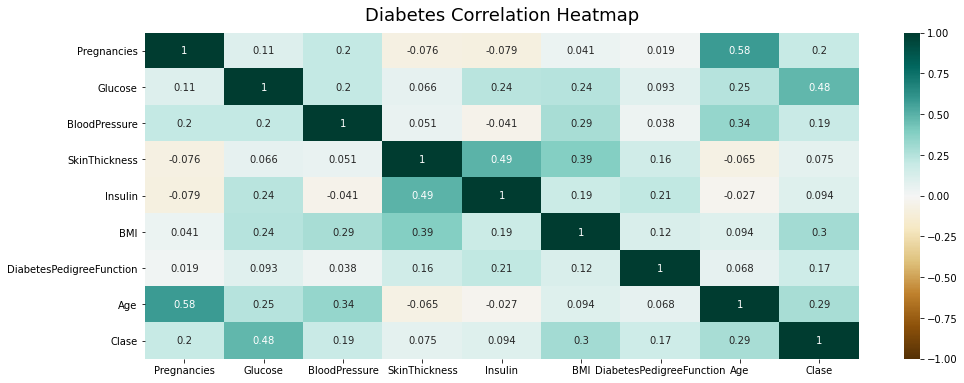

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(diabetesdata.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Diabetes Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

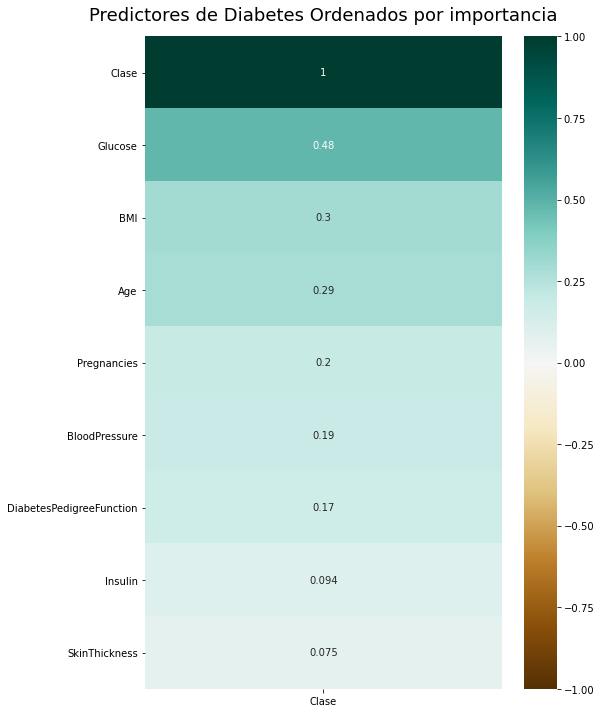

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(diabetesdata.corr()[['Clase']].sort_values(by='Clase', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Predictores de Diabetes Ordenados por importancia', fontdict={'fontsize':18}, pad=16);

### Conclusiones

- las variables con correlacion positiva mas importantes son 'glucose', 'BMI' y 'age'

## Life expectancy

Expectativa de vida, Organización Mundial de la Salud.

Status: country status according to WHO standards, Developed or Developing

Life expectancy: life expectancy in age

Adult Mortality: probability of dying between 15 and 60 years per 1000 population

Infant deaths: infant deaths per 1000 population

Alcohol: alcohol consumption rate per capita (15+), measured as liters

Percentage expenditure: expenditure on health as a percentage of GDP per capita(%)

Hepatitis B: HepB immunization coverage among 1-year-olds (%)

Measles: number of reported cases per 1000 population

BMI: average Body Mass Index of entire population

Under-five deaths: Number of under-five deaths per 1000 population

Polio: Pol3 immunization coverage among 1 year olds (%)

Total expenditure: government expenditure on health as a percentage of total government expenditure (%)

Diphtheria: diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS: deaths per 1000 live births HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Thinness 1-19 years: rate of thinness among people aged 10-19

Thinness 5-9 years: rate of thinness among people aged 5-9

Income composition of resources: Human Development Index in terms of income composition of resources

Schooling: average number of years of schooling of a population

In [39]:
lifeexp = pd.read_csv('datasets/who_life_expectancy.csv')

In [40]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [41]:
lifeexp.apply(lambda x: len(x.unique())) 

Country                             193
Year                                 16
Status                                2
Life expectancy                     363
Adult Mortality                     426
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          88
Measles                             958
 BMI                                609
under-five deaths                   252
Polio                                74
Total expenditure                   819
Diphtheria                           82
 HIV/AIDS                           200
GDP                                2491
Population                         2279
 thinness  1-19 years               201
 thinness 5-9 years                 208
Income composition of resources     626
Schooling                           174
dtype: int64

In [42]:
lifeexp_profiling = ProfileReport(lifeexp, title="Pandas Profiling Report")

In [44]:
lifeexp_profiling.to_widgets()

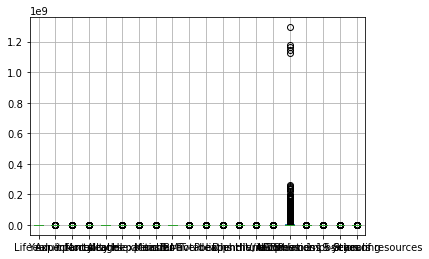

In [45]:
lifeexp.boxplot();

In [ ]:
lifeexpdata = remove_outlier_IQR(lifeexp)

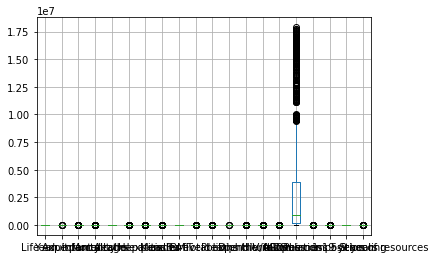

In [48]:
lifeexpdata.boxplot();

Ajuste de datos para minería

In [66]:
lifeexp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [68]:
lifeexp['Country'] = lifeexp['Country'].astype('string')
lifeexp['Status'] = lifeexp['Status'].astype('string')

In [69]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   string 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   string 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Weather US

Clima USA

In [87]:
weather = pd.read_csv('datasets/weatherAUS.csv')

In [88]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Convertir variable taget 'RainTomorrow' a categórica (está boolean)

In [72]:
weather_profiling = ProfileReport(weather, title="Pandas Profiling Report")

In [ ]:
weather_profiling.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/sebacastillo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Breast Cancer

Cancer de mamas

In [66]:
breastc = pd.read_csv('datasets/breast_cancer.csv', sep=';')

In [67]:
breastc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   mean radius              569 non-null    object
 1   mean texture             569 non-null    object
 2   mean perimeter           569 non-null    object
 3   mean area                569 non-null    object
 4   mean smoothness          569 non-null    object
 5   mean compactness         569 non-null    object
 6   mean concavity           569 non-null    object
 7   mean concave points      569 non-null    object
 8   mean symmetry            569 non-null    object
 9   mean fractal dimension   569 non-null    object
 10  radius error             569 non-null    object
 11  texture error            569 non-null    object
 12  perimeter error          569 non-null    object
 13  area error               569 non-null    object
 14  smoothness error         569 non-null    o

Convertir columnas a numeric

In [80]:
breastc_profiling = ProfileReport(breastc, title="Pandas Profiling Report")

In [81]:
breastc_profiling.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# *Clase de Consulta

- Qué se hace con valores nulos:    
   + se elimina registro   
   + se elimina columna   
   + Tratar de reemplazar: 
      * por estadístico de referencia,    
      * por regresión (de acuerdo a valores existentes),    

# Aplicando modelos predictivos a los datos